<a href="https://colab.research.google.com/github/Vespidboss243/proyectoFinal-Preanalitica/blob/main/Pre_Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [93]:
# Desinstalar e instalar pandas profiling
!pip uninstall pandas-profiling -y -q
!pip install pandas-profiling[notebook] -q

In [94]:
#Cargamos los datos
data = pd.read_csv("waterQuality1.csv")
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [95]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [96]:
data.loc[data['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [97]:
data.loc[data['is_safe'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [98]:
data.drop(data[data['is_safe']=='#NUM!'].index, inplace=True)

In [99]:
data['ammonia']=data["ammonia"].astype("float64")
data['is_safe']=data["is_safe"].astype("int64")

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### **Descripcion Estadistica de los Datos**

In [101]:
# Cargar librería para Profiling
from pandas_profiling import ProfileReport
 
profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

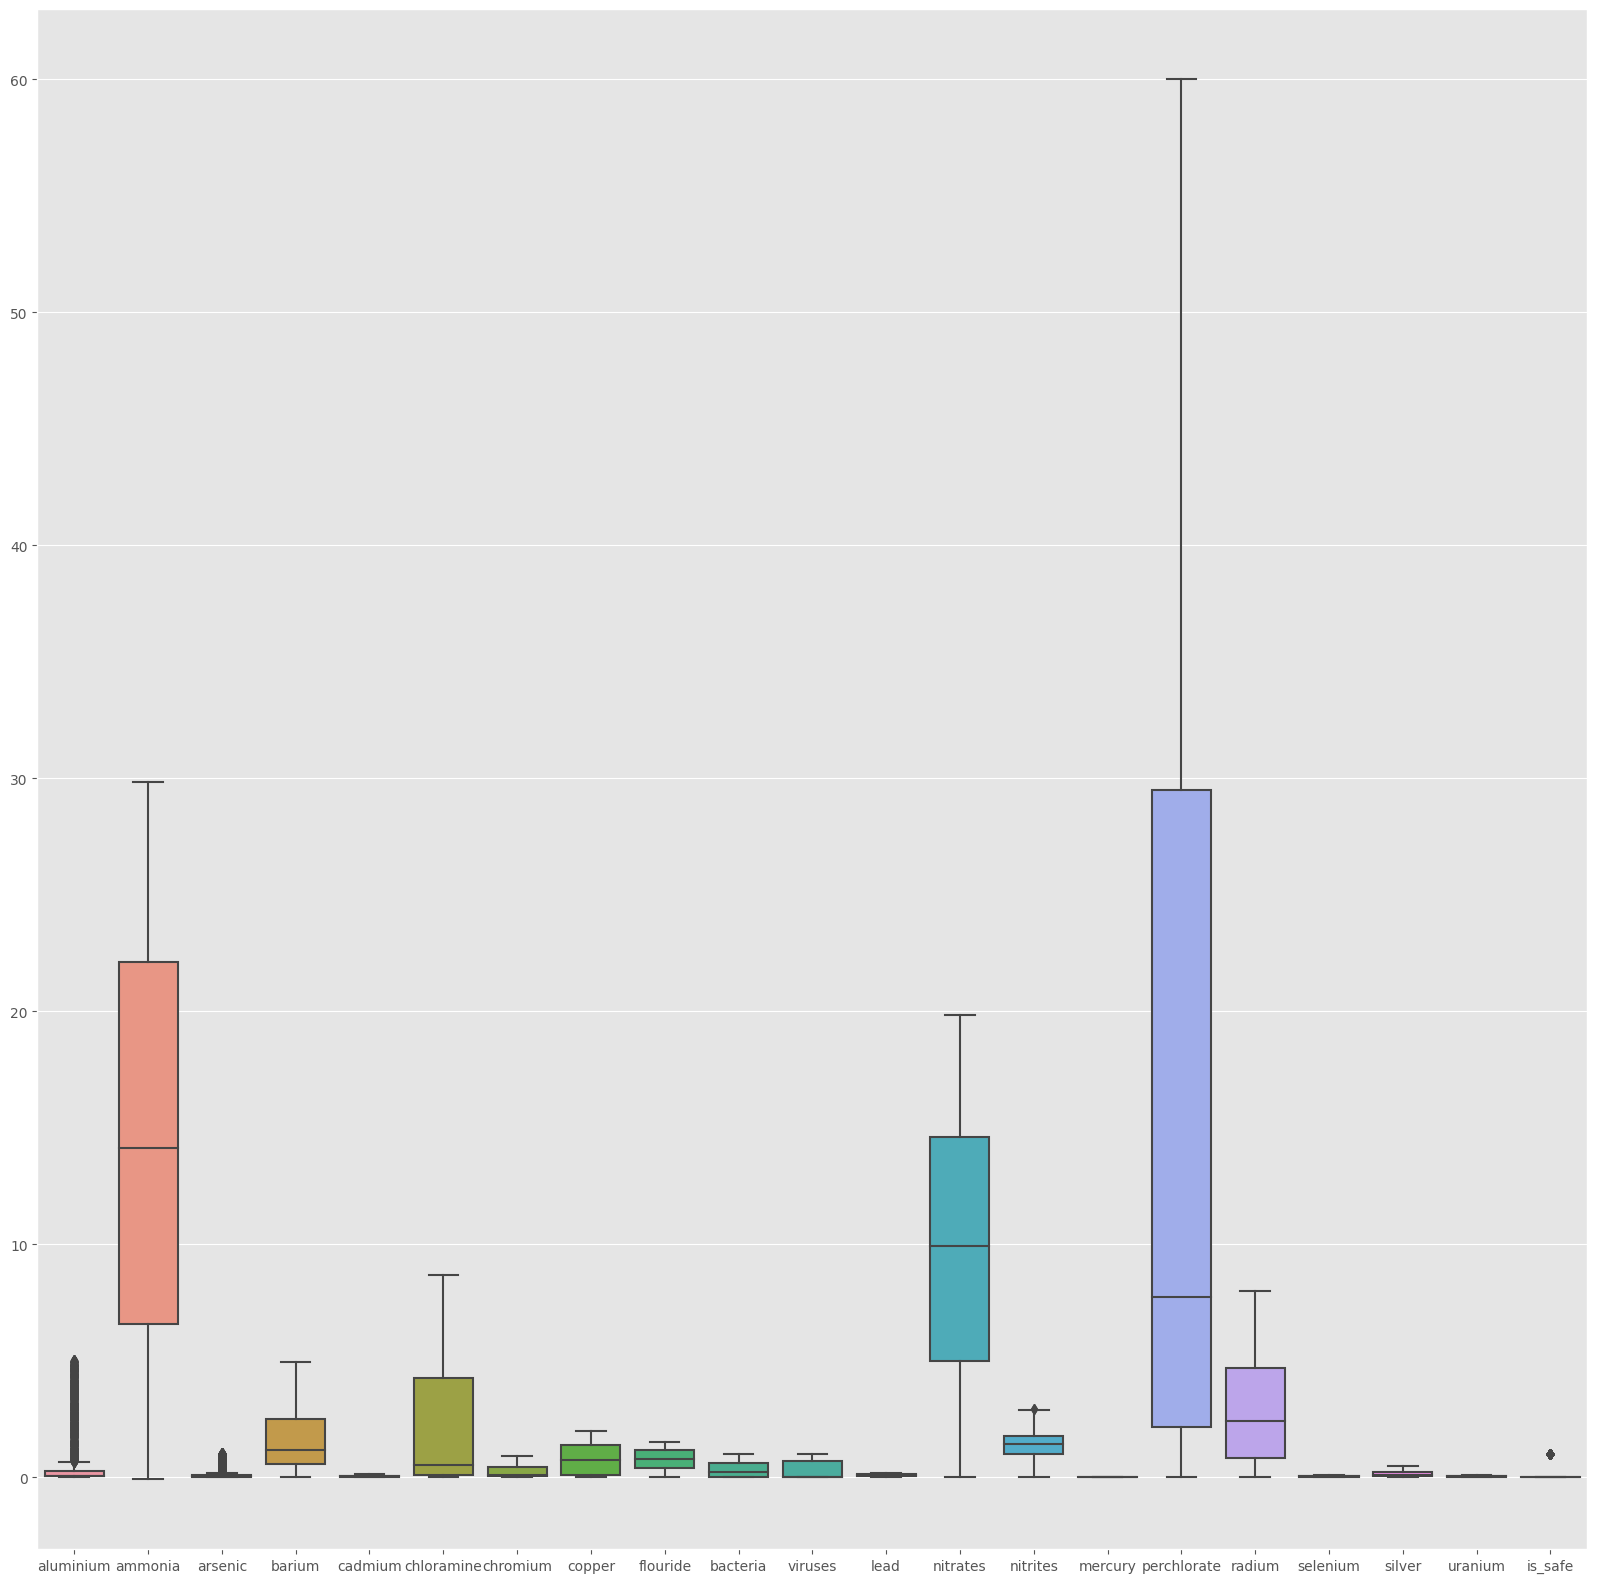

In [102]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.boxplot(data=data)

plt.show()

<Axes: >

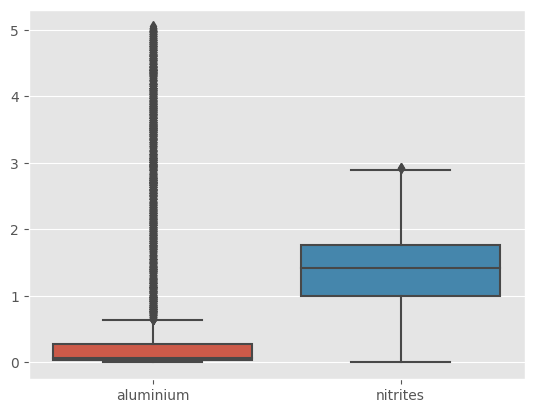

In [103]:
sns.boxplot(data=data[['aluminium','nitrites']])

<Axes: >

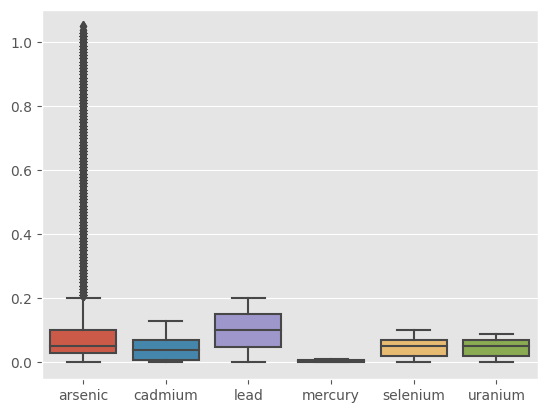

In [104]:
sns.boxplot(data=data[['arsenic','cadmium','lead','mercury','selenium','uranium']])

<Axes: >

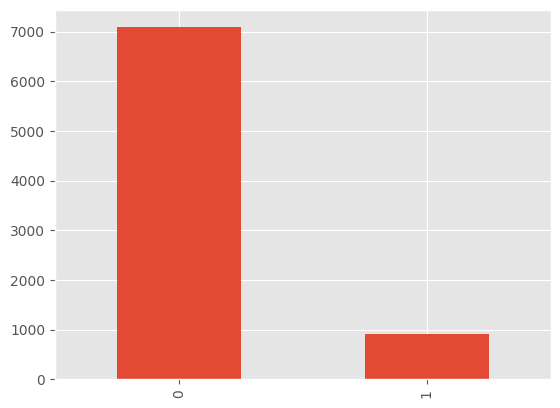

In [105]:
data['is_safe'].value_counts().plot(kind='bar')

### **Analisis de Correlaciones**

<function matplotlib.pyplot.show(close=None, block=None)>

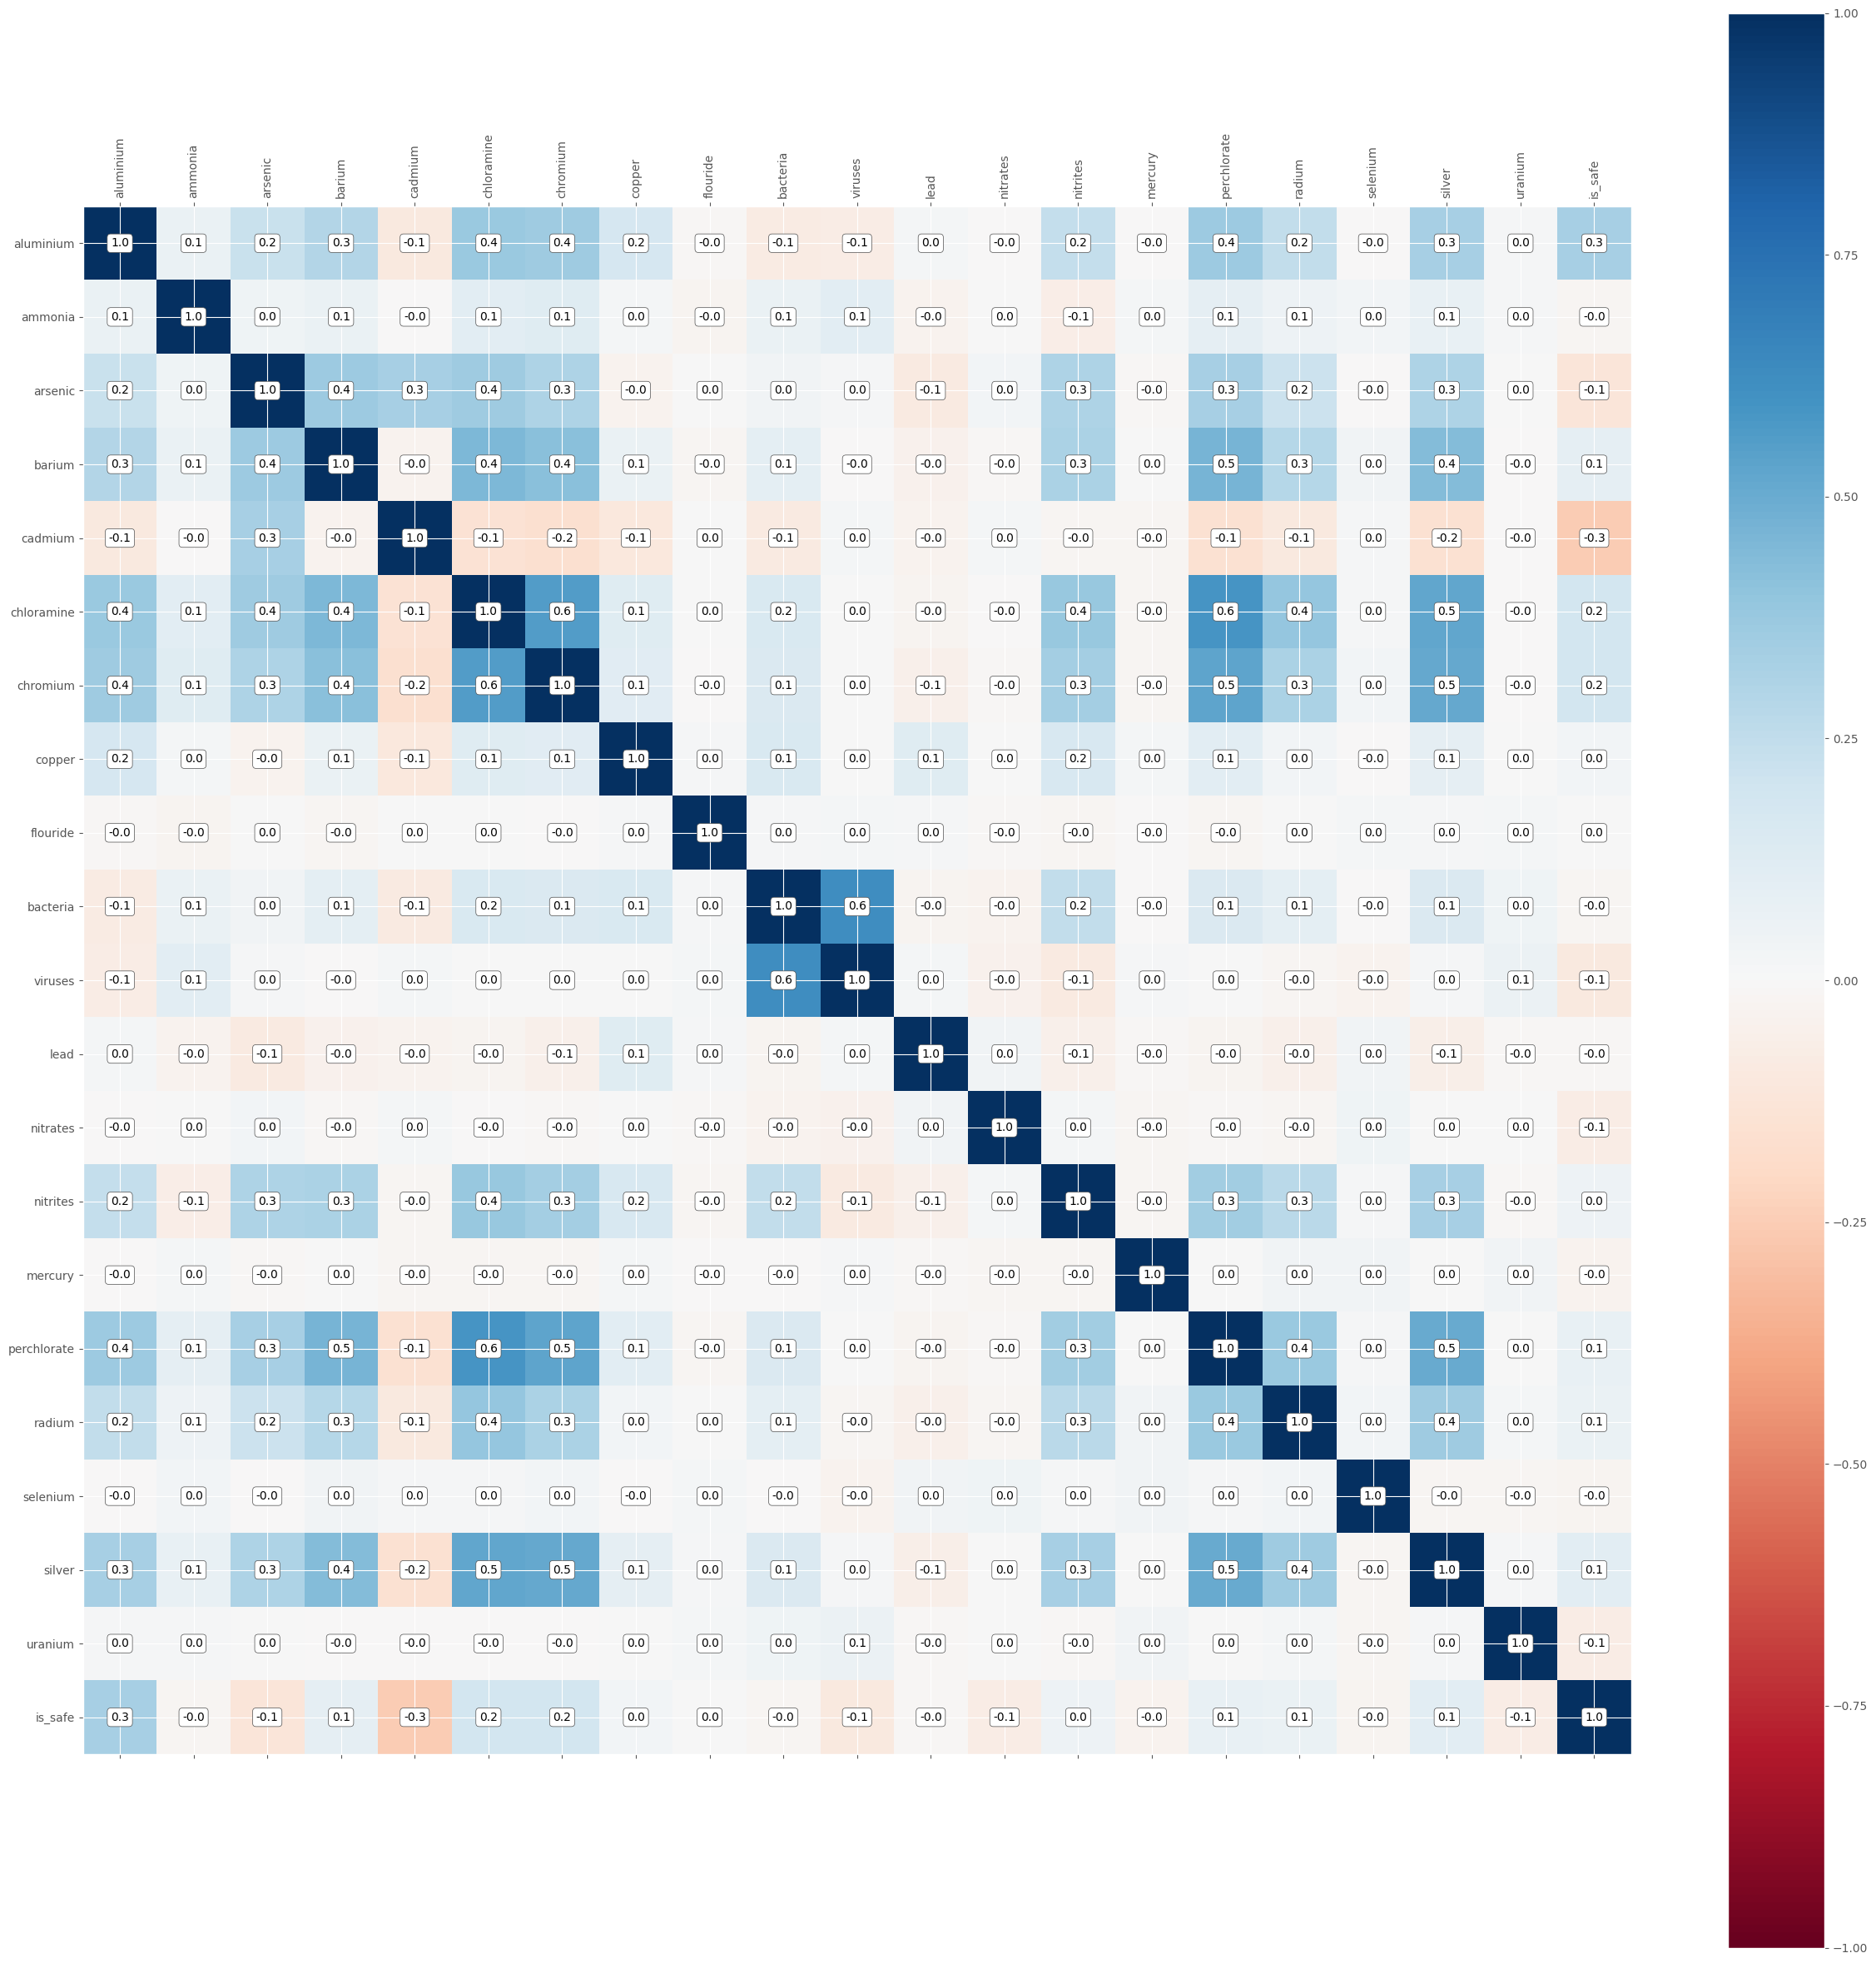

In [106]:
matriz=data.corr()
plt.figure(figsize=(30,30))

#fig, ax = plt.subplots()
plt.matshow(matriz, cmap='RdBu',vmin=-1,vmax=1,fignum=1)

plt.xticks(range(len(data.columns)),data.columns,rotation=90)
plt.yticks(range(len(data.columns)),data.columns)

for (i, j), z in np.ndenumerate(matriz):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


plt.colorbar()

plt.show

In [107]:
k=matriz['is_safe'].sort_values(ascending = True)
k.head(30)

cadmium       -0.256034
arsenic       -0.123362
viruses       -0.097040
uranium       -0.075619
nitrates      -0.072100
mercury       -0.036817
selenium      -0.030923
ammonia       -0.022919
bacteria      -0.022077
lead          -0.009970
flouride       0.006550
copper         0.029498
nitrites       0.046986
radium         0.064743
perchlorate    0.075735
barium         0.090858
silver         0.102813
chromium       0.182306
chloramine     0.186704
aluminium      0.333974
is_safe        1.000000
Name: is_safe, dtype: float64

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, mutual_info_classif, mutual_info_regression
 
X= data.drop('is_safe', axis=1)
Y= data['is_safe']
bestfeatures = SelectKBest(f_classif, k=2)
fit=bestfeatures.fit(X, Y)
fit.get_feature_names_out()

array(['aluminium', 'cadmium'], dtype=object)

In [109]:
#Dataframe con los scores y nombres de las variables
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Score']  
featureScores

,Variables,Score
0,aluminium,1003.575959
1,ammonia,4.201304
2,arsenic,123.534096
3,barium,66.541902
4,cadmium,560.795707
5,chloramine,288.723524
6,chromium,274.818978
7,copper,6.962078
8,flouride,0.343003
9,bacteria,3.898278


In [110]:
data=data.drop(columns=['lead','flouride'])

#**Pipes**

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

## Limpieza de atipicos

In [112]:
#Funcion para limpiar atípicos
def remove_outliers(X):
    #Se asigna valor nulo a los atípicos
    X.arsenic[(X["arsenic"]<0.6)]=np.nan #Nulo
    X.aluminium[(X["aluminium"]<4)]=np.nan #Nulo
    return X

##Limpieza de nulos

In [113]:
# Pipeline para preparar datos numéricos: imputar y normalizar
Transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [114]:
# Definir el pipeline completo
pipe = Pipeline(steps=[
    ('outliers', FunctionTransformer(remove_outliers)),
    ('transformer', Transformer)
])

# **Balanceo**

In [115]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
from imblearn.over_sampling import SMOTE

X = data.drop("is_safe", axis = 1) # Variables predictoras
Y = data['is_safe'] #Variable objetivo
# transform the dataset
sm = SMOTE()
X1, Y1 = sm.fit_resample(X, Y)

Y1.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: is_safe, dtype: float64

In [117]:
X1.to_csv('X.csv')

In [118]:
Y1.to_csv('Y.csv')

# **Division**

<Axes: >

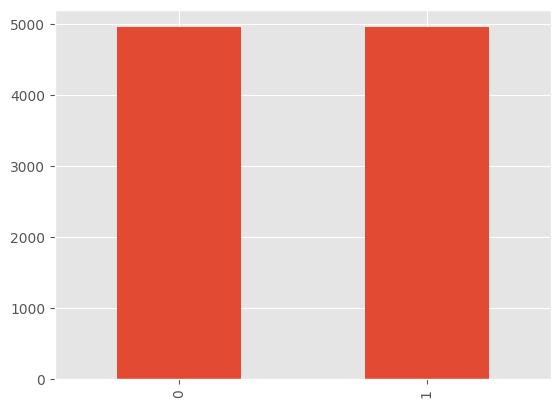

In [120]:
#División 70-30
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, stratify=Y1,random_state=1) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

In [121]:
X_train1 = pipe.fit_transform(X_train)
 
X_test1 = pipe.fit_transform(X_test)

In [122]:
X_train1

array([[0.39283296, 0.59692513, 0.44444444, ..., 0.5       , 0.76      ,
        0.33333333],
       [0.39283296, 0.18716578, 0.42409501, ..., 0.        , 0.08      ,
        0.55555556],
       [0.39283296, 0.74030749, 0.42409501, ..., 0.6       , 0.12      ,
        0.44444444],
       ...,
       [0.39283296, 0.07662025, 0.42409501, ..., 0.66780472, 0.63709253,
        0.59132808],
       [0.39283296, 0.35427807, 0.42409501, ..., 0.1       , 0.12      ,
        0.33333333],
       [0.39283296, 0.98997326, 0.42409501, ..., 0.3       , 0.4       ,
        0.66666667]])

# **Modelos de Clasificación**

In [123]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=5,random_state=1) #gini, entropy
modelTree.fit(X_train1, Y_train) #70% train

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=1)

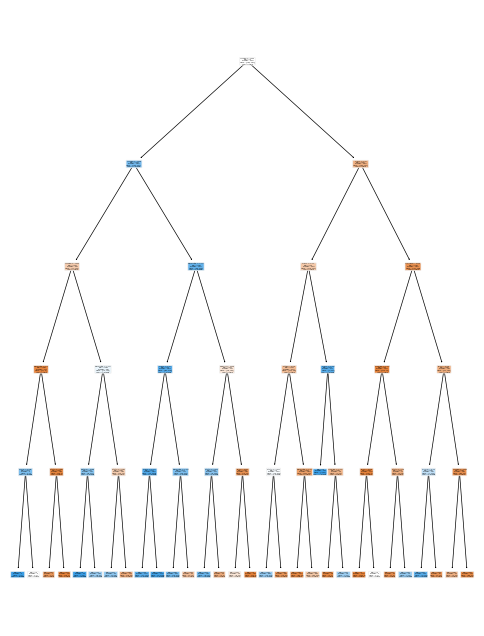

In [124]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=['potable','no potable'], rounded=True, filled=True)
plt.show()

,Arbol
Exa,0.855328
Sen,0.880527
f1,0.858913


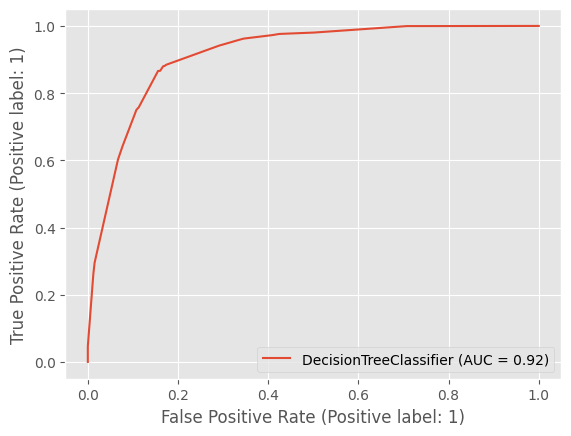

In [125]:
#Evaluación 30%
from sklearn import metrics
 
Y_pred = modelTree.predict(X_test1) #30% Test
medidas=pd.DataFrame(index=['Exa','Sen','f1'])
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelTree,X_test1, Y_test)
medidas['Arbol']=[exactitud, sensibilidad, f1]
medidas

,Arbol,KNN
Exa,0.855328,0.841920
Sen,0.880527,0.837253
f1,0.858913,0.841210


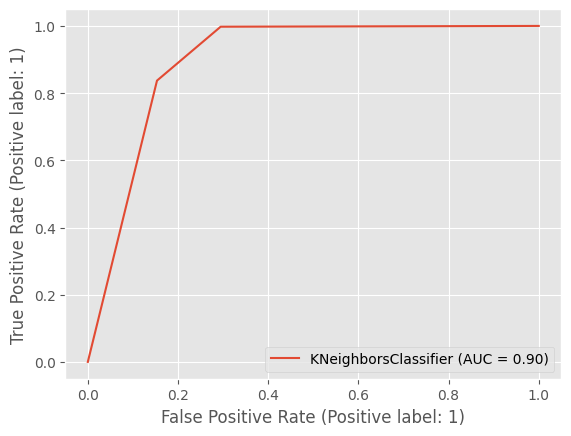

In [126]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier 
modelKnn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train1, Y_train) #70%

#Evaluación
Y_pred = modelKnn.predict(X_test1) #30% Test
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test1, Y_test)
medidas['KNN']=[exactitud, sensibilidad, f1]
medidas

In [127]:
#Red Neuronal
 
from sklearn.neural_network import MLPClassifier
#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(3,2), learning_rate='constant',
                     learning_rate_init=0.5, momentum= 0.3, max_iter=5000, random_state=1)
 
modelNN.fit(X_train1, Y_train) #70% normalizados

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 2),
              learning_rate_init=0.5, max_iter=5000, momentum=0.3,
              random_state=1)

,Arbol,KNN,NN
Exa,0.855328,0.841920,0.499882
Sen,0.880527,0.837253,0.000000
f1,0.858913,0.841210,0.000000


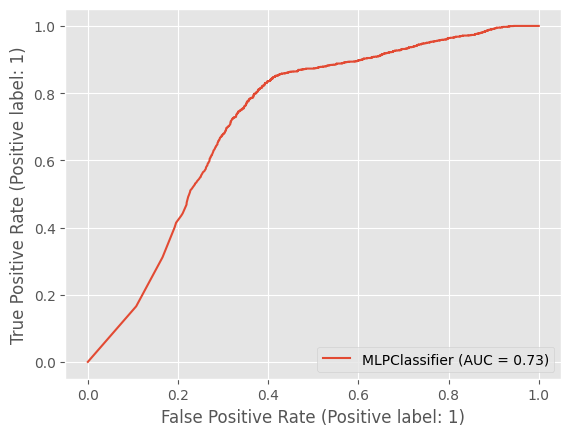

In [128]:
#Evaluación
Y_pred = modelNN.predict(X_test1) #30% Test
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test1, Y_test)
medidas['NN']=[exactitud, sensibilidad, f1]
medidas

In [129]:
#SVM
from sklearn.svm import SVC #Classifier
modelSVM = SVC(kernel='linear',random_state=1) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train1, Y_train)

SVC(kernel='linear', random_state=1)

,Arbol,KNN,NN,SVC
Exa,0.855328,0.841920,0.499882,0.755822
Sen,0.880527,0.837253,0.000000,0.816087
f1,0.858913,0.841210,0.000000,0.769743


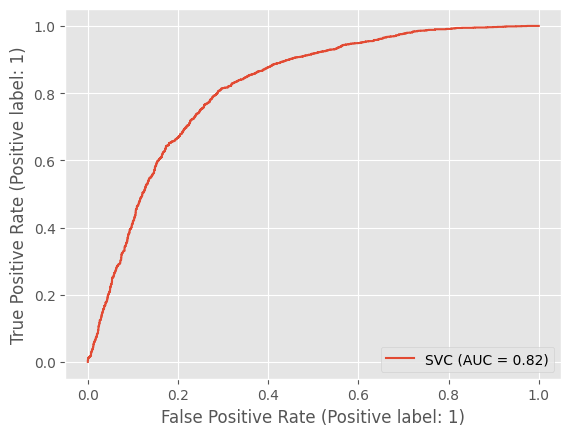

In [130]:
#Evaluación
Y_pred = modelSVM.predict(X_test1) #30% Test
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test1, Y_test)
medidas['SVC']=[exactitud, sensibilidad, f1]
medidas

# **Metodos de Ensamble**

In [131]:
#Bagging: Knn
from sklearn.ensemble import BaggingClassifier
modelo_base=KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model_bag = BaggingClassifier(modelo_base, n_estimators=10, max_samples=0.6)
model_bag.fit(X_train1, Y_train)#70%

BaggingClassifier(estimator=KNeighborsClassifier(metric='euclidean',
                                                 n_neighbors=2),
                  max_samples=0.6)

,Arbol,KNN,NN,SVC,BAG
Exa,0.855328,0.841920,0.499882,0.755822,0.861209
Sen,0.880527,0.837253,0.000000,0.816087,0.978833
f1,0.858913,0.841210,0.000000,0.769743,0.875842


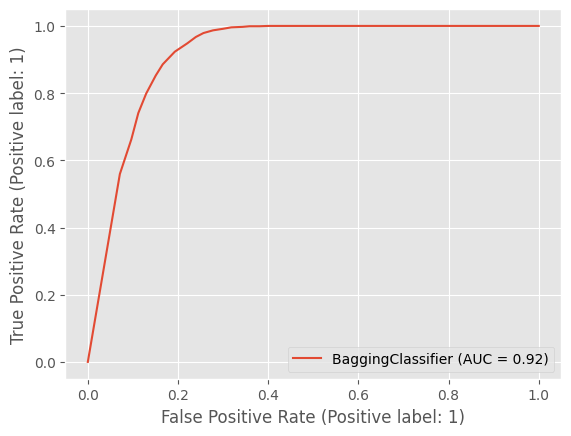

In [132]:
#Evaluación
Y_pred = model_bag.predict(X_test1) #30% Test
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_bag,X_test1, Y_test)
medidas['BAG']=[exactitud, sensibilidad, f1]
medidas

In [133]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.5, criterion='entropy',
                              max_depth=5, min_samples_leaf=2,random_state=1)
model_rf.fit(X_train1, Y_train) #70%

RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=0.5,
                       min_samples_leaf=2, random_state=1)

,Arbol,KNN,NN,SVC,BAG,RF
Exa,0.855328,0.841920,0.499882,0.755822,0.861209,0.849682
Sen,0.880527,0.837253,0.000000,0.816087,0.978833,0.846190
f1,0.858913,0.841210,0.000000,0.769743,0.875842,0.849186


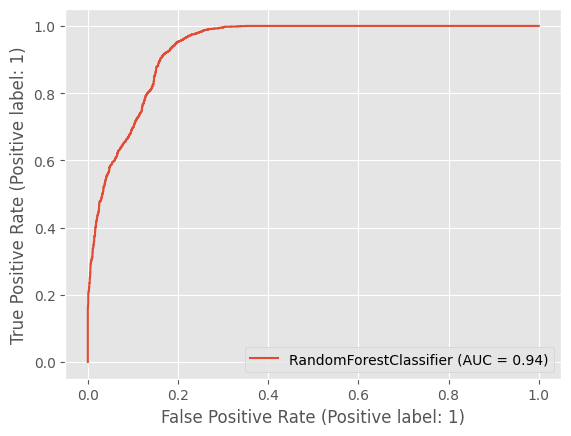

In [134]:
#Evaluación
Y_pred = model_rf.predict(X_test1) #30% Test
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_rf,X_test1, Y_test)
medidas['RF']=[exactitud, sensibilidad, f1]
medidas

In [135]:
#Votación soft
 
from sklearn.ensemble import VotingClassifier
 
Clas= [('dt', modelTree), ('knn', modelKnn), ('net', modelNN)]
model_vot_soft = VotingClassifier(estimators=Clas, weights=[0.2, 0.4, 0.3],voting='soft')
model_vot_soft.fit(X_train1,Y_train) #70%

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=2,
                                                     random_state=1)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=2)),
                             ('net',
                              MLPClassifier(activation='logistic',
                                            hidden_layer_sizes=(3, 2),
                                            learning_rate_init=0.5,
                                            max_iter=5000, momentum=0.3,
                                            random_state=1))],
                 voting='soft', weights=[0.2, 0.4, 0.3])

In [136]:
#Evaluación
Y_pred = model_vot_soft.predict(X_test1) #30% Test
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
sensibilidad=metrics.recall_score(y_true=Y_test, y_pred=Y_pred)
f1=metrics.f1_score(y_true=Y_test, y_pred=Y_pred)
# Curva ROC
#metrics.RocCurveDisplay.from_estimator(model_vot_soft,X_test1, Y_test)
medidas['VS']=[exactitud, sensibilidad, f1]
medidas

,Arbol,KNN,NN,SVC,BAG,RF,VS
Exa,0.855328,0.841920,0.499882,0.755822,0.861209,0.849682,0.900024
Sen,0.880527,0.837253,0.000000,0.816087,0.978833,0.846190,0.982126
f1,0.858913,0.841210,0.000000,0.769743,0.875842,0.849186,0.907629


# **Hiperparametrizacion**

In [137]:
from sklearn.model_selection import GridSearchCV
#  Arbol
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

# Definir los hiperparametros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,5,10,50] # Cantidad de registros por hoja
max_depth=[5,10,15,20] #Niveles de profundidad

#Hiperparametrización 
from sklearn.model_selection import GridSearchCV
 
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='recall', n_jobs=-1, cv=10)
grid.fit(X_train1, Y_train) #70%
 
#Mejor modelo
modelTree= grid.best_estimator_
 
#Medida de evaluación del mejor modelo

In [138]:
#Medida de evaluación del mejor modelo
medidas1= pd.DataFrame(index=['Recall'])
medidas1['Tree']=grid.best_score_
 
# Mejores párametros

print( grid.best_params_)
print(medidas1)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}
            Tree
Recall  0.934249


In [139]:
#Bagging
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier()
 
# Definir los hiperparametros
base_knn= KNeighborsClassifier(n_neighbors=2, metric='euclidean')

base_nn1= DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, max_depth=10,random_state=2) 

base_nn2= MLPClassifier(activation="relu",hidden_layer_sizes=(4), learning_rate='adaptive',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=100, verbose=False)
 
base_estimator=[base_knn, base_nn1, base_nn2] #Métodos de Machine Learning
n_estimators=[10,50,100] 
max_samples=[0.6,0.7,0.8]
 
#Grid
param_grid = dict(base_estimator=base_estimator, n_estimators=n_estimators,max_samples=max_samples)
grid = GridSearchCV(estimator=model_bag, param_grid=param_grid, scoring='recall', n_jobs=-1, cv=5)
grid.fit(X_train1, Y_train)
 
#Mejor modelo
model_bag= grid.best_estimator_
 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [140]:
medidas1['BAG']=grid.best_score_
 
# Mejores párametros

print( grid.best_params_)
print(medidas1)

{'base_estimator': KNeighborsClassifier(metric='euclidean', n_neighbors=2), 'max_samples': 0.6, 'n_estimators': 100}
            Tree       BAG
Recall  0.934249  0.990924


In [141]:
#Votación soft
from sklearn.linear_model import LogisticRegression

base_tree = DecisionTreeClassifier()
base_rl = LogisticRegression()
base_svc = SVC()
base_knn = KNeighborsClassifier()
base_nn = MLPClassifier()


clf = VotingClassifier(estimators=[('dt', base_tree), ('lr', base_rl), ('svc', base_svc),('knn',base_knn),('NN',base_nn)],voting='soft',weights=[0.2, 0.4, 0.3])
#put the combination of parameters here 
p = [{'estimators':[[('KNN',KNeighborsClassifier()),('Tree',DecisionTreeClassifier())],
                    [('KNN',KNeighborsClassifier()),('NN',MLPClassifier()),('Tree',DecisionTreeClassifier())],
                    [('SVC', SVC()),('Tree',DecisionTreeClassifier())],
                    [('SVC', SVC()),('KNN',KNeighborsClassifier())],
                    [('LOG', LogisticRegression()),('Tree',DecisionTreeClassifier())]


                    

]}]

grid = GridSearchCV(clf,p,cv=5,scoring='recall')
grid.fit(X_train1,Y_train)

model_VS= grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

#**Mejor modelo**

In [142]:
medidas1['VS']=grid.best_score_
 
# Mejores párametros

print( grid.best_params_)
print(medidas1)

{'estimators': [('KNN', KNeighborsClassifier()), ('NN', MLPClassifier()), ('Tree', DecisionTreeClassifier())]}
            Tree       BAG        VS
Recall  0.934249  0.990924  0.944737


In [143]:
import pickle
filename = 'modeloDef.pkl'

pickle.dump([model_bag,pipe], open(filename, 'wb')) #write